<a href="https://colab.research.google.com/github/waigani64/ImageAnalysis/blob/main/Phase_Field_Crystallization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

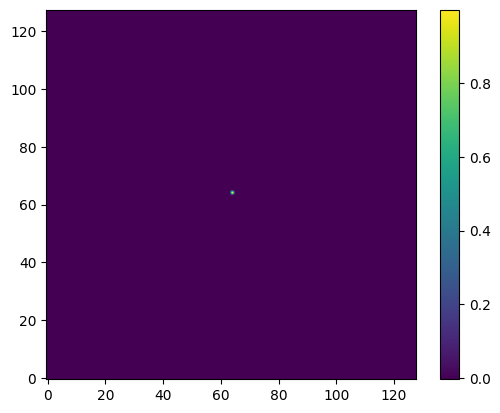

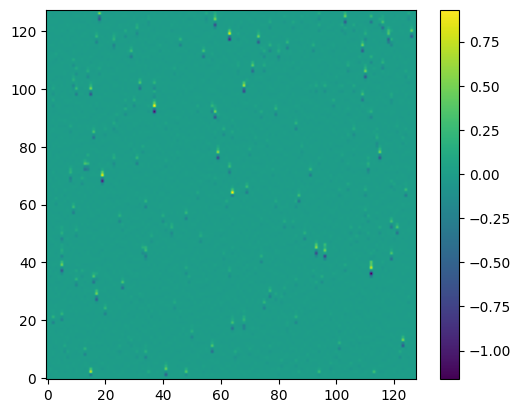

<ipython-input-9-f55bbf668d6d>:24: RuntimeWarning: overflow encountered in multiply
  return kappa / 2.0 * (phi**2 + eps**2) * ((1.0 - phi)**2 + eps**2) + sigma * phi * c
<ipython-input-9-f55bbf668d6d>:24: RuntimeWarning: overflow encountered in square
  return kappa / 2.0 * (phi**2 + eps**2) * ((1.0 - phi)**2 + eps**2) + sigma * phi * c
<ipython-input-9-f55bbf668d6d>:24: RuntimeWarning: invalid value encountered in add
  return kappa / 2.0 * (phi**2 + eps**2) * ((1.0 - phi)**2 + eps**2) + sigma * phi * c
<ipython-input-9-f55bbf668d6d>:29: RuntimeWarning: overflow encountered in multiply
  mu = sigma - kappa * (2.0 * phi - 1.0) * (1.0 - 2.0 * phi) - mobility * (phi - phi.sum() / (nx*ny))
<ipython-input-9-f55bbf668d6d>:24: RuntimeWarning: invalid value encountered in multiply
  return kappa / 2.0 * (phi**2 + eps**2) * ((1.0 - phi)**2 + eps**2) + sigma * phi * c


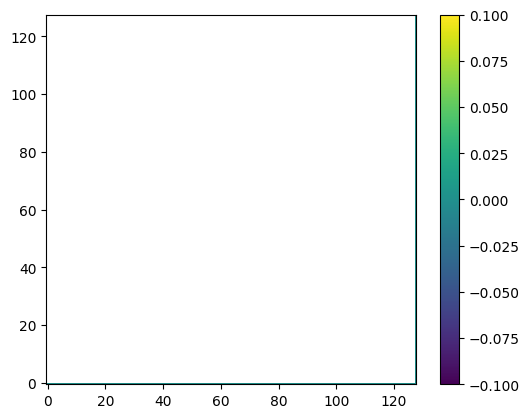

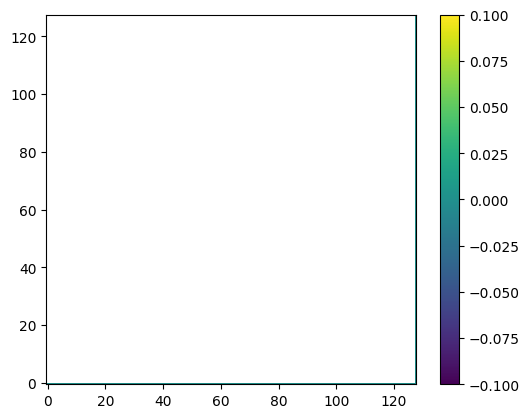

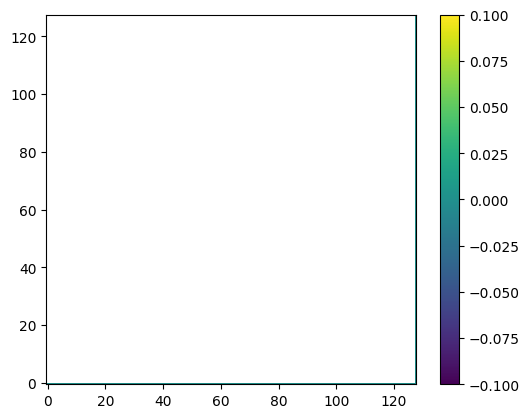

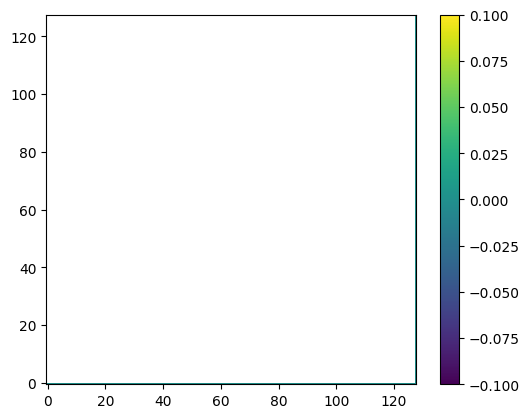

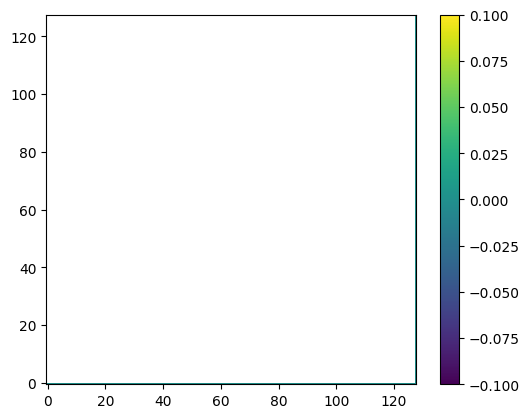

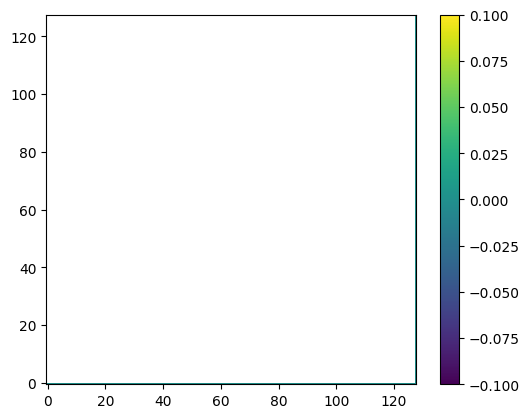

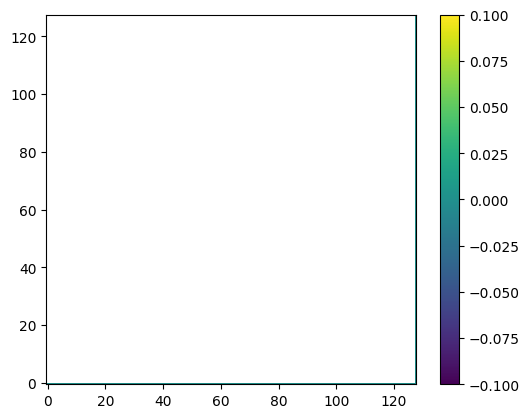

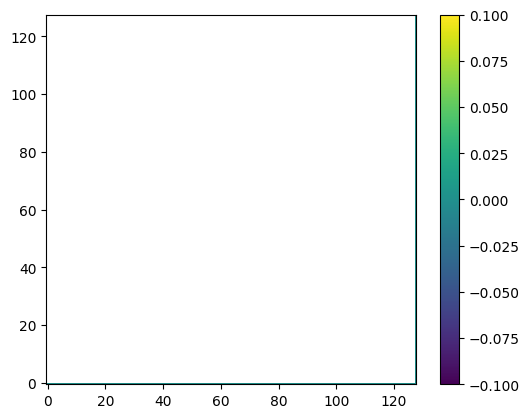

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kappa = 1.0
sigma = 1.0
mobility = 1.0

# Grid size
nx = ny = 128
dx = dy = 1.0
dt = 0.01

# Initialize concentration field
c = np.zeros((nx, ny))
c[nx//2, ny//2] = 1.0

# Initialize order parameter field
phi = np.random.rand(nx, ny)

# Define the free energy density function
def f(phi, c):
    eps = 1e-8  # small constant value
    return kappa / 2.0 * (phi**2 + eps**2) * ((1.0 - phi)**2 + eps**2) + sigma * phi * c

# Run the simulation
for i in range(1000):
    # Calculate the chemical potential
    mu = sigma - kappa * (2.0 * phi - 1.0) * (1.0 - 2.0 * phi) - mobility * (phi - phi.sum() / (nx*ny))

    # Update the order parameter field
    phi = phi + dt * mobility * np.gradient(mu)[0]

    # Update the concentration field
    c = c + dt * np.gradient(-f(phi, c))[0]

    # Enforce boundary conditions
    phi[0,:] = phi[-1,:] = phi[:,0] = phi[:,-1] = 0.5
    c[0,:] = c[-1,:] = c[:,0] = c[:,-1] = 0.0

    # Plot the results
    if i % 100 == 0:
        plt.imshow(c, cmap='viridis', origin='lower')
        plt.colorbar()
        plt.show()
